In [1]:
require './moromoro'

true

In [2]:
def angle_to_radian(angle)
  (angle.to_f / 360.0) * 2 * Math::PI
end

:angle_to_radian

In [34]:
# 右は次数mが正、左は次数mが負
# D: 0 → 区別なし, 1 → D1, 2 → D2
a_df = <<DATA.to_df
m, D, degree, minute, second
0, 0, 0, 0, 0
1, 0, 6, 47, 0
2, 0, 13, 39, 0
3, 1, 20, 42, 30
3, 2, 20, 44, 0
4, 1, 28, 8, 0
4, 2, 28, 10, 0
5, 1, 36, 7, 0
5, 2, 36, 9, 0
6, 1, 45, 1, 0
6, 2, 45, 4, 30
7, 1, 55, 37, 0
7, 2, 55, 41, 0
8, 1, 70, 25, 30
8, 2, 70, 34, 30
-1, 0, 6, 45, 30
-2, 0, 13, 38, 30
-3, 1, 20, 42, 30
-3, 2, 20, 43, 30
-4, 1, 28, 7, 30
-4, 2, 28, 9, 30
-5, 1, 36, 7, 0
-5, 2, 36, 9, 30
-6, 1, 45, 1, 0
-6, 2, 45, 5, 0
-7, 1, 55, 37, 30
-7, 2, 55, 42, 30
-8, 1, 70, 36, 0
-8, 2, 70, 47, 30
DATA
a_df.save_csv('csv/raw_data.csv')
a_radianed = a_df.map do |row|
  row.merge({ 'angle' => "#{row['degree'].to_i}°#{row['minute'].to_i}′#{row['second'].to_i}″", 'theta[rad]' => angle_to_radian(row['degree'] + row['minute']/60.0 + row['second']/3600.0) })
end.reset
nil

In [38]:
n = 2000 * 100
delta_theta = 7.3 * 10**(-5)
a_with_calc = a_radianed.group_by { |row| [row['m'].abs, row['D']] }.map do |(m, d), v|
  two_theta_m = v.map { |row| row['theta[rad]'] }.inject(:+)
  theta_m = two_theta_m / 2
  lamb = Math.sin(two_theta_m/2)/(m * n)
  {
    'm' => m.to_i,
    'D' => d.to_i,
    'angle_left' => v.find { |row| row['m'] < 0.0 }&.fetch('angle') { nil } || v.first['angle'],
    'angle_right' => v.find { |row| row['m'] > 0.0 }&.fetch('angle') { nil } || v.first['angle'],
    '2_theta_m' => two_theta_m.round(4),
    'theta_m' => theta_m.round(4),
    'sin_theta_m' => Math.sin(theta_m).round(4),
    'lambda[nm]' => (lamb * 10**9).round(1),
    'delta_lambda[nm]' => (lamb.abs * delta_theta / Math.tan(theta_m) * 10**9).round(2)
  }
end.to_df

m,D,angle_left,angle_right,2_theta_m,theta_m,sin_theta_m,lambda[nm],delta_lambda[nm]
0,0,0°0′0″,0°0′0″,0.0,0.0,0.0,NaN,NaN
1,0,6°45′30″,6°47′0″,0.2363,0.1182,0.1179,589.5,0.36
2,0,13°38′30″,13°39′0″,0.4763,0.2382,0.2359,589.8,0.18
3,1,20°42′30″,20°42′30″,0.7229,0.3614,0.3536,589.4,0.11
3,2,20°43′30″,20°44′0″,0.7236,0.3618,0.354,589.9,0.11
4,1,28°7′30″,28°8′0″,0.9819,0.4909,0.4715,589.3,0.08
4,2,28°9′30″,28°10′0″,0.9831,0.4915,0.472,590.0,0.08
5,1,36°7′0″,36°7′0″,1.2607,0.6304,0.5894,589.4,0.06
5,2,36°9′30″,36°9′0″,1.262,0.631,0.59,590.0,0.06
6,1,45°1′0″,45°1′0″,1.5714,0.7857,0.7073,589.4,0.04


In [40]:
a_with_calc.map do |row|
  {
    'm' => row['m'],
    'D' => row['D'] == 0 ? '' : "$ D_#{row['D']} $",
    'angle(left)' => row['angle_left'],
    'angle(right)' => row['angle_right'],
    '2\theta_m' => row['2_theta_m'],
    '\theta_m' => row['theta_m'],
    '\sin\theta_m' => row['sin_theta_m'],
    '\lambda[nm]' => row['lambda[nm]'],
    '\Delta\lambda_m[nm]' => row['delta_lambda[nm]']
  }
end.to_df.save_csv('csv/data.csv')

"csv/data.csv"

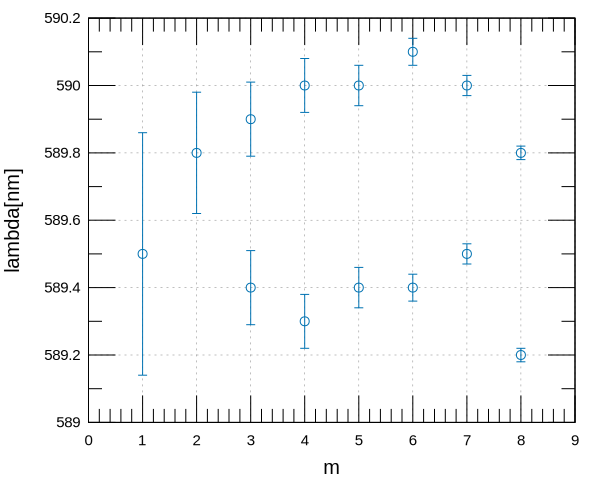

In [23]:
a_with_calc.plot(
  targets: [{ x: 'm', y: 'lambda[nm]', yerror: 'delta_lambda[nm]', with: :yerrorbars, lt: 6 }],
  options: {
    xrange: '[0:9]',
    nokey: ''
  },
  file: 'graph/a_with_calc.png'
)